<a href="https://colab.research.google.com/github/DavyL0/credit-analyse/blob/main/Mod13_Tarefa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import patsy

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

<Axes: xlabel='tipo_residencia', ylabel='tempo_emprego'>

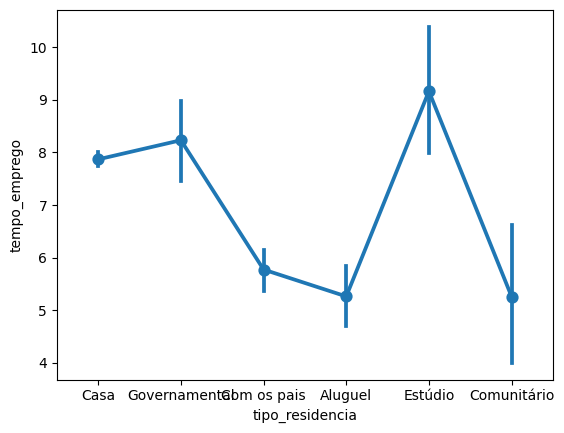

In [4]:
sns.pointplot(y = 'tempo_emprego', x = 'tipo_residencia', data = df)

In [5]:
y, x = patsy.dmatrices('renda ~ C(tipo_residencia)', data = df)
x

DesignMatrix with shape (15000, 6)
  Columns:
    ['Intercept',
     'C(tipo_residencia)[T.Casa]',
     'C(tipo_residencia)[T.Com os pais]',
     'C(tipo_residencia)[T.Comunitário]',
     'C(tipo_residencia)[T.Estúdio]',
     'C(tipo_residencia)[T.Governamental]']
  Terms:
    'Intercept' (column 0), 'C(tipo_residencia)' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [6]:
data = pd.DataFrame({'tipo_residencia': [1, 2, 3, 5, 4]})
data

,tipo_residencia
0,1
1,2
2,3
3,5
4,4


In [7]:
from patsy import dmatrix
dmatrix("C(tipo_residencia)", data)

DesignMatrix with shape (5, 5)
  Columns:
    ['Intercept',
     'C(tipo_residencia)[T.2]',
     'C(tipo_residencia)[T.3]',
     'C(tipo_residencia)[T.4]',
     'C(tipo_residencia)[T.5]']
  Terms:
    'Intercept' (column 0), 'C(tipo_residencia)' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

In [10]:
y, x = patsy.dmatrices('tempo_emprego ~ C(tipo_residencia)', data = df)
x

DesignMatrix with shape (12427, 6)
  Columns:
    ['Intercept',
     'C(tipo_residencia)[T.Casa]',
     'C(tipo_residencia)[T.Com os pais]',
     'C(tipo_residencia)[T.Comunitário]',
     'C(tipo_residencia)[T.Estúdio]',
     'C(tipo_residencia)[T.Governamental]']
  Terms:
    'Intercept' (column 0), 'C(tipo_residencia)' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [17]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          tempo_emprego   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     20.31
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.99e-20
Time:                        13:52:20   Log-Likelihood:                -41240.
No. Observations:               12427   AIC:                         8.249e+04
Df Residuals:                   12421   BIC:                         8.254e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               5.2643      0.494     10.652      0.000       4.296       6.233
C(tipo_residencia)[T.Casa]              2.6055      0.498      5.229      0.000       1.629       3.582
C(tipo_residencia)[T.Com os pais]       0.5106      0.557      0.916      0.360      -0.582       1.603
C(tipo_residencia)[T.Comunitário]      -0.0026      0.971     -0.003      0.998      -1.906       1.900
C(tipo_residencia)[T.Estúdio]           3.8996      0.917      4.254      0.000       2.103       5.696
C(tipo_residencia)[T.Governamental]     2.9688      0.607      4.891      0.000       1.779       4.158
==============================================================================
Omnibus:                     3989.219   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12151.454
Skew:                           1.675   Prob(JB):                         0.00
Kurtosis:                       6.500   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
reg = smf.ols('tempo_emprego ~ C(tipo_residencia, Treatment(2)) + np.log(renda)', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          tempo_emprego   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     446.5
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:53:16   Log-Likelihood:                -40077.
No. Observations:               12427   AIC:                         8.017e+04
Df Residuals:                   12420   BIC:                         8.022e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           -19.3417      0.549    -35.211      0.000     -20.418     -18.265
C(tipo_residencia, Treatment(2))[T.Aluguel]          -0.8865      0.508     -1.747      0.081      -1.881       0.108
C(tipo_residencia, Treatment(2))[T.Casa]              1.7796      0.242      7.365      0.000       1.306       2.253
C(tipo_residencia, Treatment(2))[T.Comunitário]      -0.1237      0.796     -0.155      0.877      -1.685       1.437
C(tipo_residencia, Treatment(2))[T.Estúdio]           1.6042      0.742      2.162      0.031       0.150       3.059
C(tipo_residencia, Treatment(2))[T.Governamental]     2.3116      0.397      5.816      0.000       1.533       3.091
np.log(renda)                                         3.0746      0.061     50.564      0.000       2.955       3.194
==============================================================================
Omnibus:                     3278.628   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8592.051
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                       5.909   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""